# Analyse the Raw Visual Attention Metrics

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import os
from modules import stats as util_stats

plt.rcParams['savefig.facecolor'] = 'white'


## Load the data

In [2]:
def click_data_to_list(click_data_string):
    click_data_list = []
    for click in click_data_string.split(" "):
        click = click.split("-")
        # extract the x and y coordinates from a string via regex
        x = int(re.search(r'\d+', click[0])[0])
        y = int(re.search(r'\d+', click[1])[0])
        click_data_list.append((x, y))
    return click_data_list  #


def time_data_to_list(time_data_string):
    time_data_list = []
    for time in time_data_string.split(" "):
        time_data_list.append(float(time) / 1000)
    return time_data_list

In [3]:
# check if result folder exists
if not os.path.exists("./results"):
    os.mkdir("./results")

In [4]:
df = pd.read_csv('./data/preprocessed_experiment_data.csv')
df = df[df["Outlier"] == False]
df = df.drop(columns=["Outlier"])

df["ClickData"] = df["ClickData"].apply(lambda x: click_data_to_list(x))
df["TimeData"] = df["TimeData"].apply(lambda x: time_data_to_list(x))
df["NumberOfClicks"] = df["ClickData"].apply(lambda x: len(x))
df["AverageTimeOfClicks"] = (df["ResponseTime"] / 1000) / df["NumberOfClicks"]

## Descriptive: Number Of Clicks per Algorithm

In [5]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
df_tmp = df_visual[["Algorithm", "ProgrammingStyle", "NumberOfClicks"]].groupby(
    ["Algorithm", "ProgrammingStyle"]).describe()
df_tmp.to_excel("./results/data/RQ2_number_of_clicks_per_algorithm.xlsx", index=False)
df_tmp

NumberOfClicks                              \
                                          count       mean        std   min   
Algorithm     ProgrammingStyle                                                
LinkedList    higher-order                  5.0  39.800000  21.288495  11.0   
              iterative                     6.0  45.333333  12.785408  33.0   
              list-comprehension            7.0  41.714286  15.923926  25.0   
              recursive                     6.0  31.166667  16.129683   8.0   
apply         higher-order                  8.0   3.500000   0.755929   3.0   
              iterative                     7.0   7.142857   1.676163   4.0   
              list-comprehension            6.0   3.666667   1.211060   3.0   
              recursive                     7.0  20.571429  14.953897   6.0   
computer      higher-order                  7.0  44.142857  35.690468  18.0   
              iterative                     5.0  29.400000   4.774935  25.0   
              list-comprehension            8.0  33.125000  16.348329  19.0   
              recursive                     4.0  26.500000  16.583124   5.0   
condition_sum higher-order                  6.0   5.833333   3.188521   3.0   
              iterative                     7.0  16.857143  10.447146   8.0   
              list-comprehension            7.0   9.428571   3.457222   6.0   
              recursive                     6.0  12.500000   8.093207   6.0   
find          higher-order                  5.0  20.800000  26.499057   7.0   
              iterative                     7.0   9.714286   4.535574   6.0   
              list-comprehension            6.0   5.333333   2.422120   3.0   
              recursive                     6.0  21.500000   7.918333  12.0   
is_prime      higher-order                  7.0  13.285714  13.250337   4.0   
              iterative                     9.0  15.777778  10.732867   8.0   
              list-comprehension            5.0   2.800000   0.836660   2.0   
              recursive                     7.0  12.857143   4.220133   8.0   
max           higher-order                  8.0   7.000000   5.477226   3.0   
              iterative                     6.0  13.000000   6.782330   5.0   
              list-comprehension            7.0   8.428571   4.197505   6.0   
              recursive                     7.0  21.285714  18.364044   7.0   
node          higher-order                  7.0  34.571429  15.778225  10.0   
              iterative                     7.0  40.428571  12.594405  28.0   
              list-comprehension            5.0  36.000000  19.685020  17.0   
              recursive                     5.0  46.000000  17.818530  30.0   
prime_factors higher-order                  7.0  17.857143   8.513295   9.0   
              iterative                     6.0  23.833333   7.704977  17.0   
              list-comprehension            6.0  22.000000  32.631273   4.0   
              recursive                     6.0  51.166667  48.329770  18.0   
quad_mul      higher-order                  5.0   7.000000   1.224745   6.0   
              iterative                     8.0  13.750000   5.922114   9.0   
              list-comprehension            6.0  12.666667  11.075498   6.0   
              recursive                     6.0   5.000000   1.673320   2.0   
store         higher-order                  4.0  51.250000  23.271943  17.0   
              iterative                     6.0  56.833333  23.327380  12.0   
              list-comprehension            6.0  75.333333  36.843814  32.0   
              recursive                     6.0  63.666667  17.750117  33.0   
total         higher-order                 69.0  20.739130  22.513821   3.0   
              iterative                    74.0  23.675676  18.224707   4.0   
              list-comprehension           69.0  23.043478  26.571455   2.0   
              recursive                    66.0  27.712121  24.958282   2.0   

   

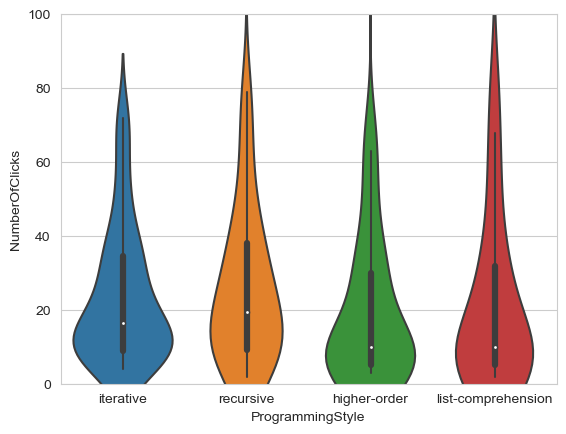

In [6]:
df_tmp = df_visual[["ProgrammingStyle", "Algorithm", "NumberOfClicks"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
ax = sns.violinplot(x="ProgrammingStyle", y="NumberOfClicks", data=df_tmp,
                    hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.set(ylim=(0.0, 100.0))
plt.savefig("./results/visual_attention_number_of_clicks_per_style_violin.png")
plt.show()
plt.close('all')

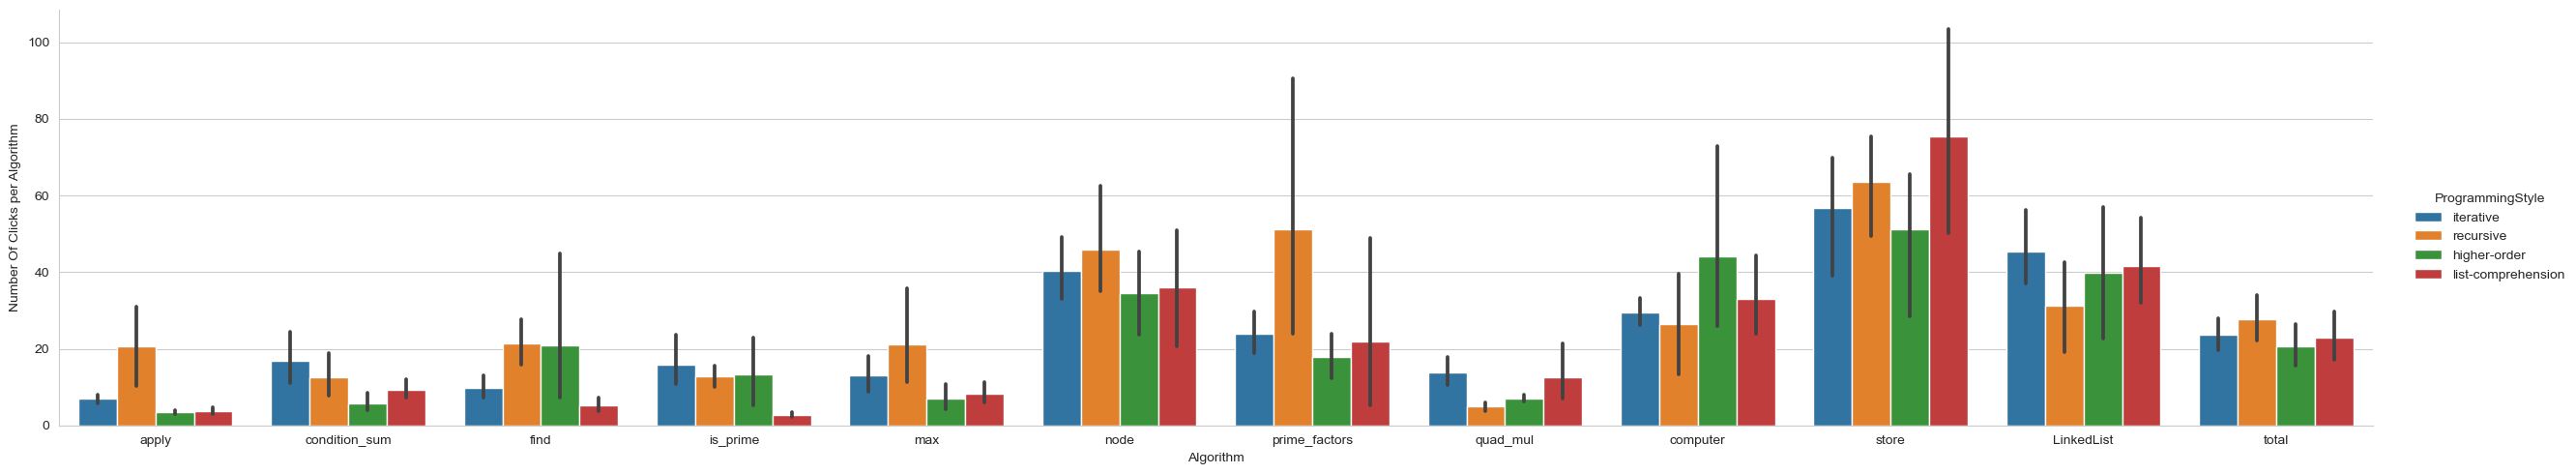

In [7]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
ax = sns.catplot(x="Algorithm", y="NumberOfClicks", hue="ProgrammingStyle", data=df_visual, kind="bar", height=5,
                 aspect=5, hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.tight_layout()
ax.set(ylabel='Number Of Clicks per Algorithm')
plt.savefig("./results/visual_attention_number_of_clicks_per_algorithm.png")
plt.show()
plt.close('all')

## Descriptive: Get Average Time of Clicks per Algorithm

In [8]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
df_tmp = df_visual[["Algorithm", "ProgrammingStyle", "AverageTimeOfClicks"]].groupby(
    ["Algorithm", "ProgrammingStyle"]).describe()
df_tmp.to_excel("./results/data/RQ2_average_time_of_clicks_per_algorithm.xlsx", index=False)
df_tmp

AverageTimeOfClicks                        \
                                               count       mean        std   
Algorithm     ProgrammingStyle                                               
LinkedList    higher-order                       5.0   3.870583   4.786513   
              iterative                          6.0   1.322143   0.315762   
              list-comprehension                 7.0   1.666785   0.665028   
              recursive                          6.0   2.871412   3.427894   
apply         higher-order                       8.0   3.044512   2.517295   
              iterative                          7.0   5.693800   6.896022   
              list-comprehension                 6.0  15.986319  26.145068   
              recursive                          7.0   2.278829   1.593352   
computer      higher-order                       7.0   2.481384   1.274106   
              iterative                          5.0   2.561939   1.110463   
              list-comprehension                 8.0   1.847289   0.584720   
              recursive                          4.0   6.992149   9.903901   
condition_sum higher-order                       6.0  19.009406  27.818300   
              iterative                          7.0   2.245018   0.716550   
              list-comprehension                 7.0   4.055946   1.762658   
              recursive                          6.0   2.582092   0.875142   
find          higher-order                       5.0   8.156059   7.688899   
              iterative                          7.0   2.245674   1.269006   
              list-comprehension                 6.0   4.746681   2.964698   
              recursive                          6.0   2.460136   2.023651   
is_prime      higher-order                       7.0   5.863747   6.851100   
              iterative                          9.0   2.895691   2.410473   
              list-comprehension                 5.0   2.037000   0.938687   
              recursive                          7.0   3.097253   2.870054   
max           higher-order                       8.0   3.377257   2.118235   
              iterative                          6.0   2.977039   2.396996   
              list-comprehension                 7.0   2.854884   1.355707   
              recursive                          7.0   3.875878   4.335688   
node          higher-order                       7.0   1.714489   0.472124   
              iterative                          7.0   1.694089   0.846538   
              list-comprehension                 5.0   2.575038   1.994722   
              recursive                          5.0   2.018593   0.974096   
prime_factors higher-order                       7.0   5.027794   3.789875   
              iterative                          6.0   3.045216   3.042379   
              list-comprehension                 6.0  11.336141  20.253148   
              recursive                          6.0   2.865086   0.921142   
quad_mul      higher-order                       5.0   5.589538   6.248374   
              iterative                          8.0   3.340192   2.945449   
              list-comprehension                 6.0   4.506165   3.229365   
              recursive                          6.0   4.022583   3.245806   
store         higher-order                       4.0   2.185366   1.759323   
              iterative                          6.0   3.878688   6.081055   
              list-comprehension                 6.0   1.476232   0.516884   
              recursive                          6.0   1.391671   0.135009   
total         higher-order                      69.0   5.331375   9.590110   
              iterative                         74.0   2.920014   3.244970   
              list-comprehension                69.0   4.727406  10.091997   
              recursive                         66.0   3.030048   3.323463   

                                                      

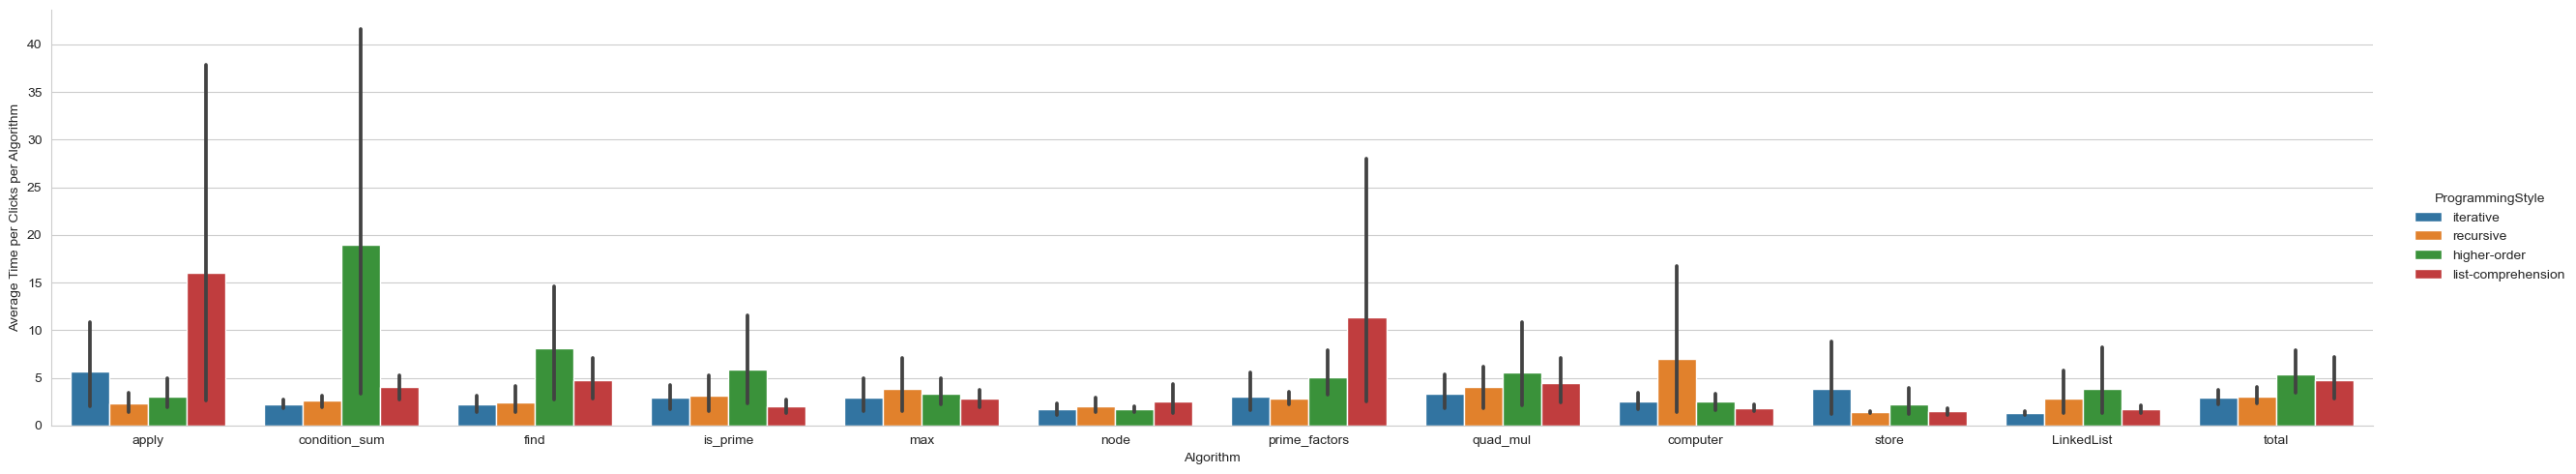

In [9]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
ax = sns.catplot(x="Algorithm", y="AverageTimeOfClicks", hue="ProgrammingStyle", data=df_visual, kind="bar", height=5,
                 aspect=5, hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.tight_layout()
ax.set(ylabel='Average Time per Clicks per Algorithm')
plt.savefig("./results/visual_attention_average_time_of_clicks_per_algorithm.png")
plt.show()
plt.close('all')

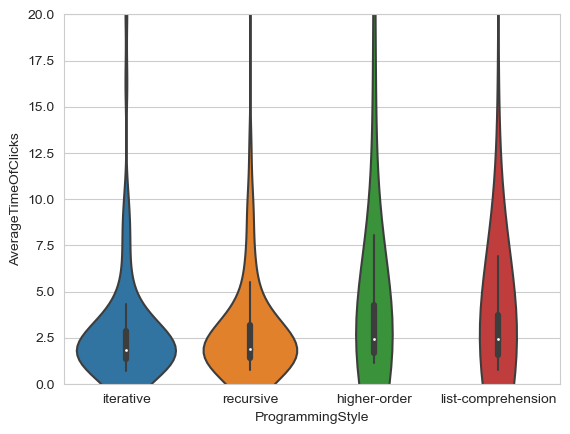

In [10]:
df_tmp = df_visual[["ProgrammingStyle", "Algorithm", "AverageTimeOfClicks"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
ax = sns.violinplot(x="ProgrammingStyle", y="AverageTimeOfClicks", data=df_tmp,
                    hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.set(ylim=(0.0, 20.0))
plt.savefig("./results/visual_attention_average_time_of_clicks_per_style_violin.png")
plt.show()
plt.close('all')

## Inferential Statistics

In [11]:
from modules import stats as util_stats

In [26]:
df_tmp = df.copy()
df_tmp = df_tmp[["ProgrammingStyle", "NumberOfClicks"]]
df_tmp = df_tmp.groupby("ProgrammingStyle").describe()
display(df_tmp)
df_tmp.to_excel("./results/data/RQ2_NumberOfClicks_Describe.xlsx")

NumberOfClicks                                         \
                            count       mean        std  min   25%   50%   
ProgrammingStyle                                                           
higher-order                 69.0  20.739130  22.513821  3.0  5.00  10.0   
iterative                    74.0  23.675676  18.224707  4.0  9.00  16.5   
list-comprehension           69.0  23.043478  26.571455  2.0  5.00  10.0   
recursive                    66.0  27.712121  24.958282  2.0  9.25  19.5   

                                 
                     75%    max  
ProgrammingStyle                 
higher-order        30.0  122.0  
iterative           34.5   74.0  
list-comprehension  32.0  141.0  
recursive           38.0  145.0

In [12]:
df_tmp = df.copy()
df_tmp = util_stats.mannwhitneyu_for_df(df_tmp, "ProgrammingStyle", "NumberOfClicks")
display(df_tmp)
df_tmp.to_excel("./results/data/RQ2_NumberOfClicks_P.xlsx")

,Categorie_A,Categorie_B,p_value,Significant
0,iterative,recursive,0.578488,False
1,iterative,higher-order,0.009116,False
2,iterative,list-comprehension,0.019663,False
3,recursive,higher-order,0.007021,True
4,recursive,list-comprehension,0.017478,False
5,higher-order,list-comprehension,0.874616,False


In [16]:
df_tmp = df.copy()
df_tmp = df_tmp[["ProgrammingStyle", "NumberOfClicks"]]
df_effect_size = util_stats.effectsize_for_df(df_tmp, "ProgrammingStyle", "NumberOfClicks")
df_effect_size.to_excel("./results/data/RQ2_NumberOfClicks_E.xlsx")
df_effect_size

,Categorie_A,Categorie_B,Effect_Size
0,iterative,recursive,-0.186366
1,iterative,higher-order,0.143905
2,iterative,list-comprehension,0.027927
3,recursive,higher-order,0.293724
4,recursive,list-comprehension,0.180986
5,higher-order,list-comprehension,-0.093572


In [15]:
df_tmp = df.copy()
df_tmp = df_tmp[["ProgrammingStyle", "AverageTimeOfClicks"]]
df_tmp = df_tmp.groupby("ProgrammingStyle").describe()
display(df_tmp)
df_tmp.to_excel("./results/data/RQ2_TimeOfClicks_Describe.xlsx")

AverageTimeOfClicks                                 \
                                 count      mean        std       min   
ProgrammingStyle                                                        
higher-order                      69.0  5.331375   9.590110  1.141947   
iterative                         74.0  2.920014   3.244970  0.724260   
list-comprehension                69.0  4.727406  10.091997  0.739456   
recursive                         66.0  3.030048   3.323463  0.759105   

                                                             
                         25%       50%       75%        max  
ProgrammingStyle                                             
higher-order        1.679000  2.405000  4.295200  72.414667  
iterative           1.347553  1.833000  2.846122  20.390250  
list-comprehension  1.539972  2.423750  3.703571  68.292333  
recursive           1.410190  1.891615  3.179969  21.785800

In [14]:
df_tmp = df.copy()
df_tmp = util_stats.mannwhitneyu_for_df(df_tmp, "ProgrammingStyle", "AverageTimeOfClicks")
display(df_tmp)
df_tmp.to_excel("./results/data/RQ2_TimeOfClicks_P.xlsx")

,Categorie_A,Categorie_B,p_value,Significant
0,iterative,recursive,0.746305,False
1,iterative,higher-order,0.002095,True
2,iterative,list-comprehension,0.042765,False
3,recursive,higher-order,0.005224,True
4,recursive,list-comprehension,0.096581,False
5,higher-order,list-comprehension,0.287071,False


## Correlations

### Load Demographics

In [18]:
variable_mapping = {
    "CASE" : "ID",
    "ST04_01" : "C++",
    "ST04_02" : "Java",
    "ST04_03" : "Haskell",
    "ST04_04" : "Python",
    "ST04_05" : "Prolog",
    "ST04_06" : "Rust",
    "ST04_07" : "Kotlin",
    "ST05_01" : "Logical",
    "ST05_02" : "Imperative",
    "ST05_03" : "Functional",
    "ST05_04" : "ObjectOriented",
    "ST12" : "Iteration",
    "ST13" : "Recursion",
    "ST14" : "HigherOrder",
    "ST15" : "ListComprehension",
}

df_demographics = pd.read_csv('./data/preprocessed_total_data.csv')
df_demographics = df_demographics[variable_mapping.keys()]
df_demographics.columns = variable_mapping.values()
df_language = df_demographics.melt(id_vars="ID", value_vars=["C++", "Java", "Haskell", "Python", "Prolog", "Rust", "Kotlin"], value_name="PreExperience", var_name="Language")
df_paradigm = df_demographics.melt(id_vars="ID", value_vars=["Logical", "Imperative", "Functional", "ObjectOriented"], value_name="PreExperience", var_name="Paradigm")
df_style = df_demographics.melt(id_vars="ID", value_vars=["Iteration", "Recursion", "HigherOrder", "ListComprehension"], value_name="PreExperience", var_name="Style")

In [19]:
df_tmp = df.copy()
df_tmp = df_tmp[["ID", "ProgrammingStyle", "NumberOfClicks"]]
df_tmp = df.merge(df_demographics, on="ID")
df_tmp = df_tmp[["ProgrammingStyle", "NumberOfClicks", "Iteration", "Recursion", "HigherOrder", "ListComprehension"]]
df_correlation = pd.DataFrame(columns=["ProgrammingStyle", "PreExperience", "Correlation"])
for column in df_tmp.columns[2:]:
    for style in df_tmp["ProgrammingStyle"].unique():
        df_sub = df_tmp[df_tmp["ProgrammingStyle"] == style]
        df_corr = df_sub[["NumberOfClicks", column]].corr()
        coef = df_corr["NumberOfClicks"].values[1]
        df_correlation.loc[len(df_correlation)] = [style, column, coef]
display(df_correlation)
df_correlation.to_excel("./tmp_corr_number_pre.xlsx")

,ProgrammingStyle,PreExperience,Correlation
0,iterative,Iteration,0.182581
1,recursive,Iteration,0.122543
2,higher-order,Iteration,-0.172176
3,list-comprehension,Iteration,0.116225
4,iterative,Recursion,0.070599
5,recursive,Recursion,-0.085213
6,higher-order,Recursion,-0.203023
7,list-comprehension,Recursion,-0.002063
8,iterative,HigherOrder,-0.019187
9,recursive,HigherOrder,0.037541


In [20]:
df_tmp = df.copy()
df_tmp = df_tmp[["ID", "ProgrammingStyle", "AverageTimeOfClicks"]]
df_tmp = df.merge(df_demographics, on="ID")
df_tmp = df_tmp[["ProgrammingStyle", "AverageTimeOfClicks", "Iteration", "Recursion", "HigherOrder", "ListComprehension"]]
df_correlation = pd.DataFrame(columns=["ProgrammingStyle", "PreExperience", "Correlation"])
for column in df_tmp.columns[2:]:
    for style in df_tmp["ProgrammingStyle"].unique():
        df_sub = df_tmp[df_tmp["ProgrammingStyle"] == style]
        df_corr = df_sub[["AverageTimeOfClicks", column]].corr()
        coef = df_corr["AverageTimeOfClicks"].values[1]
        df_correlation.loc[len(df_correlation)] = [style, column, coef]
display(df_correlation)
df_correlation.to_excel("./tmp_corr_time_pre.xlsx")

,ProgrammingStyle,PreExperience,Correlation
0,iterative,Iteration,-0.288204
1,recursive,Iteration,-0.268773
2,higher-order,Iteration,-0.306510
3,list-comprehension,Iteration,-0.289071
4,iterative,Recursion,-0.157433
5,recursive,Recursion,-0.068179
6,higher-order,Recursion,-0.074052
7,list-comprehension,Recursion,-0.122614
8,iterative,HigherOrder,-0.068284
9,recursive,HigherOrder,-0.088236
